In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "./Speed_Dating_Data.csv" 
df = pd.read_csv(file_path,error_bad_lines=False)
df.iid = df.iid.astype(float)
df.pid = df.pid.astype(float)

# TODO: Intro
asdf intro stuff asdf (explain matches, attractiveness, etc.)

## Question: Are matches more common for people with similar attractivenesses?
asdf explain methodology and question and stuff asdf explain what we do below asdf

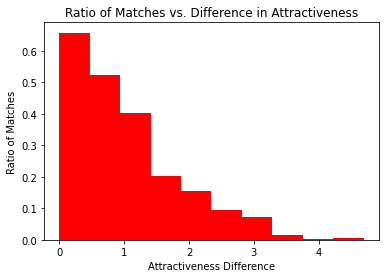

In [2]:
iids = pd.unique(df.iid)

# Assigns every unique person (by their iid) an attractiveness score based on the average of what their partners rated them
personToAttractiveness = {}
for subjectOfInterest in iids:
    attractiveness = statistics.mean(df[(df.iid == subjectOfInterest) & (df.attr_o.notna())].attr_o)
    personToAttractiveness[subjectOfInterest] = attractiveness

# Constructs a dictionary of pairs (tuple of iid and pid) to whether they matched
pairToDidMatch = {}
rowsWithPairs = df[df.iid.notna() & df.pid.notna()]
for iid in iids:
    for pid in rowsWithPairs[rowsWithPairs.iid == iid].pid:
        if (pid, iid) in pairToDidMatch:
            # Asserts that if person A matches with person B, then person B has also matched with person A
            assert rowsWithPairs[(rowsWithPairs.iid == iid) & (rowsWithPairs.pid == pid)].iloc[0].match == pairToDidMatch[(pid, iid)]
            continue
        pairToDidMatch[(iid, pid)] = rowsWithPairs[(rowsWithPairs.iid == iid) & (rowsWithPairs.pid == pid)].iloc[0].match
        
# Gets all the differences of attractivenesses between people of all pairings and also collects whether the pair matched
attractivenessDifferences = [abs(personToAttractiveness[pair[0]] - personToAttractiveness[pair[1]]) for pair in pairToDidMatch.keys()]
correspondingDidMatch = list(pairToDidMatch.values())

# Gets the attractivness difference of people who matched
attractivenessDifferencesOfMatchers = []
for i in range(len(correspondingDidMatch)):
    if correspondingDidMatch[i] == 0:
        continue
    attractivenessDifferencesOfMatchers.append(attractivenessDifferences[i])

# Plots a density histogram of people who matched where the bins are of their attractiveness difference
plt.figure()
plt.hist(attractivenessDifferencesOfMatchers, density=True, color="red")
plt.title("Ratio of Matches vs. Difference in Attractiveness")
plt.xlabel("Attractiveness Difference")
plt.ylabel("Ratio of Matches")
plt.show()

### Analysis
TODO: explain the above data/chart

## Question: Do attractive people match more?
asdf explain methodology and question and stuff asdf

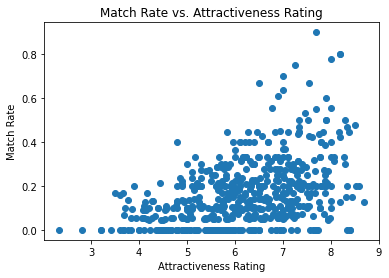

In [3]:
# Gets a list of attractivenesses of all people and calculates the proportion of matches they made
attractivenesses = list(personToAttractiveness.values())
correspondingMatchRate = []
for subjectOfInterest in iids:
    rowsOfPerson = df[(df.iid == subjectOfInterest) & (df.pid.notna())]
    matchSuccessRate = len(rowsOfPerson[rowsOfPerson.match == 1]) / len(rowsOfPerson)
    correspondingMatchRate.append(matchSuccessRate)

# Linear regression commented out because it is done below and it detracts from this plot
#linearRegressionCoefficients = np.polyfit(attractivenesses, correspondingMatchRate, 1)
#lineFunction = np.poly1d(linearRegressionCoefficients)

# Plots a scatter plot of attractiveness rating and match rate with the corresponding linear regression
plt.figure()
#plt.plot(attractivenesses, correspondingMatchRate, "o", attractivenesses, lineFunction(attractivenesses), "-")
plt.plot(attractivenesses, correspondingMatchRate, "o")
plt.title("Match Rate vs. Attractiveness Rating")
plt.xlabel("Attractiveness Rating")
plt.ylabel("Match Rate")
plt.show()

# Prints the linear regression equation
#print("Linear Regression Equation: y = {:10.5f}x + {:10.5f}.".format(*linearRegressionCoefficients))

### Analysis
TODO: explain the above data/chart and then explain why trying binning below.

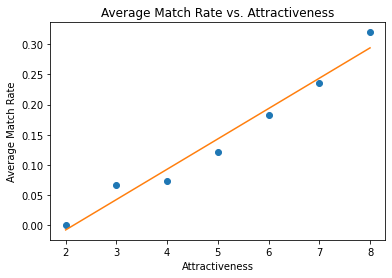

Linear Regression Equation: y =    0.05035x +   -0.10867.


In [4]:
# Maps an attractiveness bin (all atractivenesses that are in the same 'group') to a list of match rates
bins = range(1, 11)
binToMatchRates = {binValue: [] for binValue in bins}
for i in range(len(attractivenesses)):
    attractiveness = attractivenesses[i]
    binValue = int(attractiveness)
    binToMatchRates[binValue].append(correspondingMatchRate[i])
    
# Removes empty values from the dictionary
for binValue in bins:
    if len(binToMatchRates[binValue]) == 0:
        del binToMatchRates[binValue]
        
# Linear regression
x = list(binToMatchRates.keys())
y = [statistics.mean(matchRates) for matchRates in list(binToMatchRates.values())]
linearRegressionCoefficients = np.polyfit(x, y, 1)
lineFunction = np.poly1d(linearRegressionCoefficients)
    
# Plots the average match rate for each attractiveness bin
plt.figure()
plt.plot(x, y, "o", x, lineFunction(x), "-")
plt.title("Average Match Rate vs. Attractiveness")
plt.xlabel("Attractiveness")
plt.ylabel("Average Match Rate")
plt.show()

# Prints the linear regression equation
print("Linear Regression Equation: y = {:10.5f}x + {:10.5f}.".format(*linearRegressionCoefficients))

### Analysis
TODO: explain the above data/chart and whether it is different from the first scatter plot.

## Question: TODO:
asdf

93.37913249031682


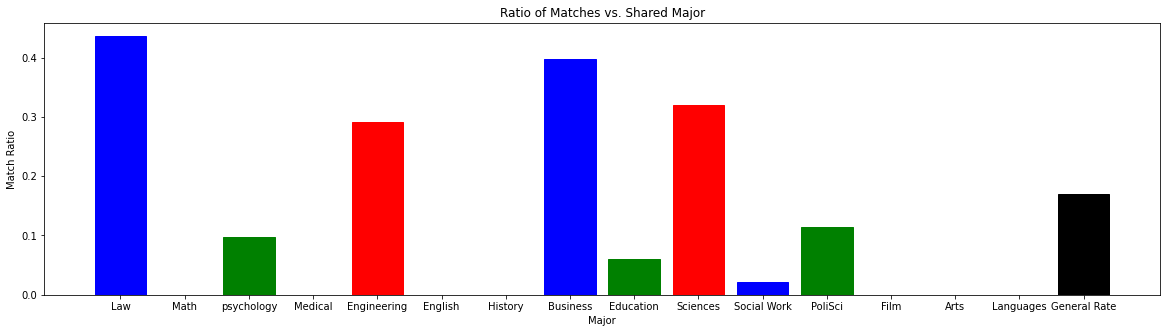

In [20]:
RowsWithProfessions = df[(df.field_cd.notna())]
ProfessionofIndividual = {iid: -1 for iid in iids}

for i in range(len(RowsWithProfessions)):
    iid=RowsWithProfessions.iloc[i].iid
    if ProfessionofIndividual[iid] != -1:
        continue
    ProfessionofIndividual[iid] = RowsWithProfessions[RowsWithProfessions.iid == iid].iloc[0].field_cd
    
for iid in ProfessionofIndividual.copy().keys():
    if ProfessionofIndividual[iid] == -1 or ProfessionofIndividual[iid] == 18:
        del ProfessionofIndividual[iid]
        
MatchesWithSameProfession=[0]*17
DatesWithSameProfession=[0]*17

AlreadyCheckedMajor=set()
        
for subject in pairToDidMatch:
    if pairToDidMatch[subject] == 1:
        if subject[0] in ProfessionofIndividual and subject[1] in ProfessionofIndividual and (subject[1],subject[0]) not in AlreadyCheckedMajor:
            if ProfessionofIndividual[subject[0]] == ProfessionofIndividual[subject[1]]:
                MatchesWithSameProfession[int(ProfessionofIndividual[int(subject[0])]-1)]+=1
            DatesWithSameProfession[int(ProfessionofIndividual[int(subject[0])]-1)]+=1
            AlreadyCheckedMajor.add((subject[1],subject[0]))
            
titles=['Law','Math','psychology','Medical','Engineering','English','History','Business','Education','Sciences','Social Work','Undecided','PoliSci','Film','Arts','Languages','Architecture','General Rate']

for i in range(len(DatesWithSameProfession)):
    if i>=len(DatesWithSameProfession):
        break
    if DatesWithSameProfession[i] == 0:
        MatchesWithSameProfession.pop(i)
        DatesWithSameProfession.pop(i)
        titles.pop(i)
        i-=1

PercentMatchMajor = [0]*len(DatesWithSameProfession)

for i in range(len(PecentMatchMajor)):
    PercentMatchMajor[i] = MatchesWithSameProfession[i]/DatesWithSameProfession[i]
    
sumRates=0  
for matchRates in correspondingMatchRate:
    sumRates+=matchRates
sumRates=sumRates/len(correspondingMatchRate)
    
PercentMatchMajor.append(sumRates)


fig = plt.figure(figsize = (20, 5)) 
Bars=plt.bar(titles,PercentMatchMajor)
colors='bgr'

j=0
for i in range(len(titles)-1):
    if PercentMatchMajor[i] != 0:
        Bars[i].set_color(colors[j%len(colors)])
        j+=1
Bars[len(Bars)-1].set_color('k')

plt.title("Ratio of Matches vs. Shared Major")
plt.xlabel("Major")
plt.ylabel("Match Ratio")
plt.show()